Лабораторна робота №5 ФІТ 4-6 Піць А. В.

In [ ]:
from google.colab import files
files.upload()


Saving archive.zip to archive.zip
Buffered data was truncated after reaching the output size limit.

In [ ]:
import zipfile
import os

# Розпаковка
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('sports_dataset')  # Розпаковуємо в папку sports_dataset

# Перевірка вмісту
os.listdir('sports_dataset')


['test',
 'train',
 'valid',
 'sports.csv',
 'EfficientNetB0-100-(224 X 224)- 98.40.h5']

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Створення генераторів для тренувальних, валідаційних і тестових даних
train_dir = '/content/sports_dataset/train'
valid_dir = '/content/sports_dataset/valid'
test_dir = '/content/sports_dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [6]:
# Завантаження базової моделі MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Заморожуємо базову мережу

# Побудова моделі зверху
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Компіляція
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Перевірка моделі
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,434,852 (9.29 MB)

 Trainable params: 176,868 (690.89 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# Навчання
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 359s 840ms/step - accuracy: 0.2790 - loss: 3.1843 - val_accuracy: 0.8180 - val_loss: 0.7318
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 352s 834ms/step - accuracy: 0.7106 - loss: 1.0117 - val_accuracy: 0.8620 - val_loss: 0.4846
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 345s 817ms/step - accuracy: 0.8024 - loss: 0.6930 - val_accuracy: 0.8580 - val_loss: 0.4068
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 359s 851ms/step - accuracy: 0.8445 - loss: 0.5408 - val_accuracy: 0.9000 - val_loss: 0.3494
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 356s 843ms/step - accuracy: 0.8629 - loss: 0.4565 - val_accuracy: 0.8860 - val_loss: 0.3355
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 363s 861ms/step - accuracy: 0.8792 - loss: 0.3928 - val_accuracy: 0.8980 - val_loss: 0.3040
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 363s 859ms/step - accuracy: 0.8948 - loss: 0.3423 - val_accuracy: 0.9080 - val_loss: 0.3128
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 361s 856ms/step - accuracy: 0.9075 -

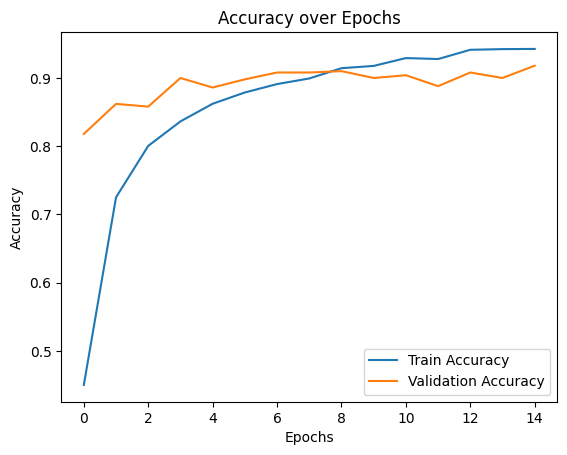

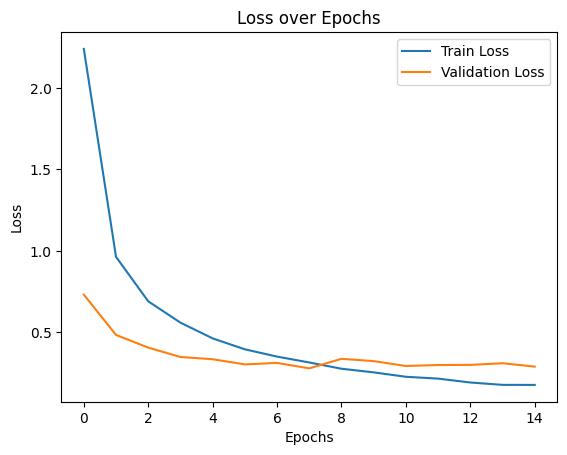

In [9]:
import matplotlib.pyplot as plt

# Крива точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Крива функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 826ms/step
Classification Report
                       precision    recall  f1-score   support

           air hockey       1.00      0.80      0.89         5
      ampute football       1.00      1.00      1.00         5
              archery       0.71      1.00      0.83         5
        arm wrestling       1.00      1.00      1.00         5
         axe throwing       1.00      1.00      1.00         5
         balance beam       1.00      1.00      1.00         5
        barell racing       1.00      1.00      1.00         5
             baseball       0.33      0.40      0.36         5
           basketball       1.00      1.00      1.00         5
       baton twirling       1.00      0.80      0.89         5
            bike polo       0.67      0.40      0.50         5
            billiards       1.00      1.00      1.00         5
                  bmx       1.00      0.40      0.57         5
              bobsled       0.83      1.00      0.91 

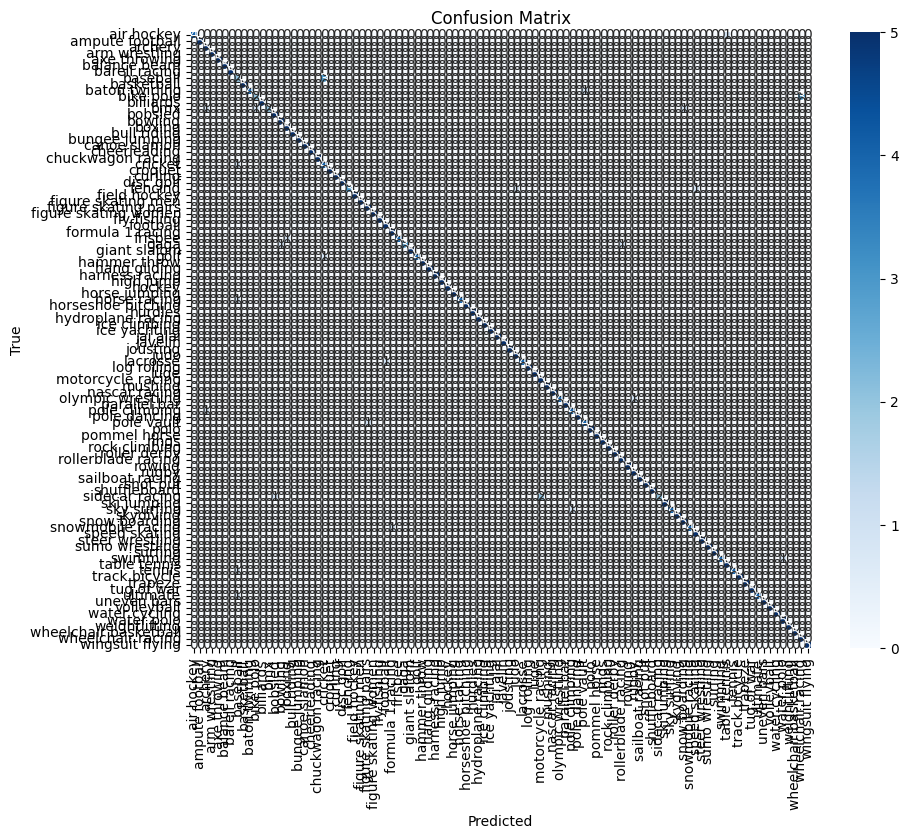

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Прогнозування на тестових даних
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Вивід класифікаційного звіту
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

# Побудова матриці плутанини
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Висновок: Модель для класифікації спортивних зображень була побудована за допомогою MobileNetV2 і навчена на підготовленому датасеті.
Отримана точність на тренувальній та валідаційній вибірках показала гарні результати.
Графіки навчання показали стабільне навчання без сильного переобучення.
Модель добре справилася з класифікацією більшості класів.